<a href="https://colab.research.google.com/github/Charangr/bigdataassignmnet/blob/main/cloudAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"charan1234444444432","key":"185ff62cc4d845bf7ed233291684cd5f"}'}

using kaggle API

In [51]:
import os

# Create .kaggle directory and copy the token file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [52]:

!pip install kaggle
!kaggle datasets download -d arvindnagaonkar/flight-delay
!unzip flight-delay.zip


Dataset URL: https://www.kaggle.com/datasets/arvindnagaonkar/flight-delay
License(s): CC0-1.0
flight-delay.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  flight-delay.zip
replace Flight_Delay.parquet? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Flight_Delay.parquet    y

replace features_added.parquet? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: features_added.parquet  a
A




Driver:

The driver (allocated 1 core and 2 GB memory) orchestrates the execution plan.
It sends tasks to the executors for distributed computation.
Executors:

Each of the 4 executors gets 5 GB of memory and 3 cores.
Executors perform the actual transformations and actions on the data in parallel.
Parallelism:

With 4 executors, each using 3 cores, your application can run up to 12 tasks concurrently.**bold text**

In [53]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, expr, concat, sum as _sum
from pyspark.sql.types import DateType


spark = SparkSession.builder \
    .appName("Flight Delay Analysis") \
    .master("local[*]") \
    .config("spark.executor.memory", "5g") \
    .config("spark.executor.cores", "3") \
    .config("spark.executor.instances", "4") \
    .config("spark.driver.memory", "2g") \
    .config("spark.driver.cores", "1") \
    .config("spark.sql.debug.maxToStringFields", "100") \
    .getOrCreate()


spark.sparkContext.getConf().getAll()


[('spark.executor.instances', '4'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/jdk.internal.ref=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'Flight Delay

In [54]:

data_path = "Flight_Delay.parquet"
df = spark.read.parquet(data_path)


total_rows = df.count()
print(f"Total Rows in Dataset: {total_rows}")

Total Rows in Dataset: 30132672


In [55]:

dataset_path = "/content/Flight_Delay.parquet"
features_path = "/content/features_added.parquet"


flight_delay_df = spark.read.parquet(dataset_path)
features_added_df = spark.read.parquet(features_path)


flight_delay_df.show(5)
features_added_df.show(5)


+----+-----+----------+----------+-------------------------+--------------+--------------+----------+-------+--------+---------------+-------+---------+--------+------+----------+-------+--------+---------------+--------------+-----------------+-------+--------+-------------+------------+------------+--------+-------------+-----------------+-----------------+
|Year|Month|DayofMonth|FlightDate|Marketing_Airline_Network|OriginCityName|  DestCityName|CRSDepTime|DepTime|DepDelay|DepDelayMinutes|TaxiOut|WheelsOff|WheelsOn|TaxiIn|CRSArrTime|ArrTime|ArrDelay|ArrDelayMinutes|CRSElapsedTime|ActualElapsedTime|AirTime|Distance|DistanceGroup|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|__index_level_0__|
+----+-----+----------+----------+-------------------------+--------------+--------------+----------+-------+--------+---------------+-------+---------+--------+------+----------+-------+--------+---------------+--------------+-----------------+-------+--------+-------------+

In [56]:
sample_fraction = 0.020
sampled_df = df.sample(fraction=sample_fraction, seed=42)

In [57]:
sampled_count = sampled_df.count()
print(f"Sampled Row Count: {sampled_count}")

Sampled Row Count: 603055


In [58]:
print(f"Number of partitions: {sampled_df.rdd.getNumPartitions()}")


Number of partitions: 6


In [59]:
sampled_df.show(10)


+----+-----+----------+----------+-------------------------+-------------------+----------------+----------+-------+--------+---------------+-------+---------+--------+------+----------+-------+--------+---------------+--------------+-----------------+-------+--------+-------------+------------+------------+--------+-------------+-----------------+-----------------+
|Year|Month|DayofMonth|FlightDate|Marketing_Airline_Network|     OriginCityName|    DestCityName|CRSDepTime|DepTime|DepDelay|DepDelayMinutes|TaxiOut|WheelsOff|WheelsOn|TaxiIn|CRSArrTime|ArrTime|ArrDelay|ArrDelayMinutes|CRSElapsedTime|ActualElapsedTime|AirTime|Distance|DistanceGroup|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|__index_level_0__|
+----+-----+----------+----------+-------------------------+-------------------+----------------+----------+-------+--------+---------------+-------+---------+--------+------+----------+-------+--------+---------------+--------------+-----------------+-------+--

In [60]:
sampled_df.printSchema()

root
 |-- Year: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- DayofMonth: long (nullable = true)
 |-- FlightDate: string (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- OriginCityName: string (nullable = true)
 |-- DestCityName: string (nullable = true)
 |-- CRSDepTime: long (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- TaxiOut: double (nullable = true)
 |-- WheelsOff: double (nullable = true)
 |-- WheelsOn: double (nullable = true)
 |-- TaxiIn: double (nullable = true)
 |-- CRSArrTime: long (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelay: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- DistanceGroup: long (nullabl

In [61]:
print(f"Row Count: {sampled_df.count()}")


Row Count: 603055


In [62]:
sampled_df.describe().show()


+-------+------------------+------------------+------------------+----------+-------------------------+--------------+------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+--------------------+-----------------+------------------+
|summary|              Year|             Month|        DayofMonth|FlightDate|Marketing_Airline_Network|OriginCityName|DestCityName|        CRSDepTime|           DepTime|          DepDelay|   DepDelayMinutes|          TaxiOut|         WheelsOff|         WheelsOn|           TaxiIn|        CRSArrTime|           ArrTime|          ArrDelay|   ArrDelayMinutes|    CRSElapsedTime| ActualElapsedTime|           AirTime|         Distance|    D

In [63]:
partition_sizes = sampled_df.rdd.glom().map(len).collect()
print(f"Partition Sizes: {partition_sizes}")

Partition Sizes: [0, 0, 603055, 0, 0, 0]


In [64]:
repartitioned_df = sampled_df.repartition(10)
print("Number of partitions after repartitioning:", repartitioned_df.rdd.getNumPartitions())


Number of partitions after repartitioning: 10


In [65]:
# need to optimize it further
repartitioned_df.cache()
print("Is the DataFrame cached?", repartitioned_df.is_cached)


Is the DataFrame cached? True


we did understand the data until now and optimized the partitioned  data next we need to do data cleaning

In [66]:
cleaned_df = cleaned_df.dropDuplicates()


In [67]:
cleaned_df = repartitioned_df.dropna(subset=["DepDelay", "ArrDelay", "FlightDate", "Marketing_Airline_Network"])


since we have cleaned the data need to preprocess it accordingly so that we can use the data set for analysis

In [68]:
from pyspark.sql.functions import to_date
processed_df = cleaned_df.withColumn("FlightDate", to_date("FlightDate", "yyyy-MM-dd"))


In [69]:
from pyspark.sql.functions import col
processed_df = processed_df.withColumn("TotalDelay", col("DepDelay") + col("ArrDelay"))


In [70]:
from pyspark.sql.functions import when

carrier_mapping = {
    "AA": "American Airlines",
    "DL": "Delta Airlines",
    "UA": "United Airlines",
    "WN": "Southwest Airlines",

}

# Map carrier codes to full names
processed_df = processed_df.withColumn(
    "CarrierName",
    when(col("Marketing_Airline_Network") == "AA", "American Airlines")
    .when(col("Marketing_Airline_Network") == "DL", "Delta Airlines")
    .when(col("Marketing_Airline_Network") == "UA", "United Airlines")
    .when(col("Marketing_Airline_Network") == "WN", "Southwest Airlines")
    .otherwise("Unknown")
)


In [71]:
# Define a dictionary for city mappings
city_mapping = {
    "ATL": "Atlanta",
    "LAX": "Los Angeles",
    "ORD": "Chicago",
    "DFW": "Dallas-Fort Worth",
    "DEN": "Denver",
    # Add more mappings as needed
}

# Map OriginCityName and DestCityName to full names
processed_df = processed_df.withColumn(
    "Origin_City",
    when(col("OriginCityName") == "ATL", "Atlanta")
    .when(col("OriginCityName") == "LAX", "Los Angeles")
    .when(col("OriginCityName") == "ORD", "Chicago")
    .when(col("OriginCityName") == "DFW", "Dallas-Fort Worth")
    .when(col("OriginCityName") == "DEN", "Denver")
    .otherwise("Unknown")
)

processed_df = processed_df.withColumn(
    "Dest_City",
    when(col("DestCityName") == "ATL", "Atlanta")
    .when(col("DestCityName") == "LAX", "Los Angeles")
    .when(col("DestCityName") == "ORD", "Chicago")
    .when(col("DestCityName") == "DFW", "Dallas-Fort Worth")
    .when(col("DestCityName") == "DEN", "Denver")
    .otherwise("Unknown")
)


In [72]:
from pyspark.sql.functions import dayofweek
processed_df = processed_df.withColumn("Weekday", dayofweek("FlightDate"))


In [73]:

processed_df = processed_df.withColumn("IsDelayed", col("TotalDelay") > 15)


In [74]:
from pyspark.sql.functions import when

processed_df = processed_df.withColumn(
    "DistanceCategory",
    when(col("Distance") <= 500, "Short-Haul")
    .when((col("Distance") > 500) & (col("Distance") <= 1500), "Medium-Haul")
    .otherwise("Long-Haul")
)


In [75]:
processed_df = processed_df.withColumn("TaxiTime", col("TaxiOut") + col("TaxiIn"))


In [76]:
processed_df = processed_df.repartition(8)


In [77]:
processed_df.cache()


DataFrame[Year: bigint, Month: bigint, DayofMonth: bigint, FlightDate: date, Marketing_Airline_Network: string, OriginCityName: string, DestCityName: string, CRSDepTime: bigint, DepTime: double, DepDelay: double, DepDelayMinutes: double, TaxiOut: double, WheelsOff: double, WheelsOn: double, TaxiIn: double, CRSArrTime: bigint, ArrTime: double, ArrDelay: double, ArrDelayMinutes: double, CRSElapsedTime: double, ActualElapsedTime: double, AirTime: double, Distance: double, DistanceGroup: bigint, CarrierDelay: double, WeatherDelay: double, NASDelay: double, SecurityDelay: double, LateAircraftDelay: double, __index_level_0__: bigint, TotalDelay: double, CarrierName: string, Origin_City: string, Dest_City: string, Weekday: int, IsDelayed: boolean, DistanceCategory: string, TaxiTime: double]

**trying** to analyze the processed data


In [78]:

processed_df.printSchema()

processed_df.show(10)


root
 |-- Year: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- DayofMonth: long (nullable = true)
 |-- FlightDate: date (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- OriginCityName: string (nullable = true)
 |-- DestCityName: string (nullable = true)
 |-- CRSDepTime: long (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- TaxiOut: double (nullable = true)
 |-- WheelsOff: double (nullable = true)
 |-- WheelsOn: double (nullable = true)
 |-- TaxiIn: double (nullable = true)
 |-- CRSArrTime: long (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelay: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- DistanceGroup: long (nullable 

In [79]:
processed_df.select("FlightDate").show(10)


+----------+
|FlightDate|
+----------+
|2019-07-13|
|2022-06-25|
|2020-07-31|
|2021-08-12|
|2020-08-21|
|2019-01-23|
|2018-03-13|
|2019-11-04|
|2018-06-11|
|2022-06-28|
+----------+
only showing top 10 rows



In [80]:
processed_df.select("DepDelay", "ArrDelay", "TotalDelay").show(10)


+--------+--------+----------+
|DepDelay|ArrDelay|TotalDelay|
+--------+--------+----------+
|    -9.0|   -32.0|     -41.0|
|    30.0|    70.0|     100.0|
|   -13.0|    -8.0|     -21.0|
|    -2.0|    -2.0|      -4.0|
|    -6.0|    -2.0|      -8.0|
|    22.0|    16.0|      38.0|
|     3.0|    -6.0|      -3.0|
|    12.0|    17.0|      29.0|
|     8.0|     0.0|       8.0|
|    -4.0|   -14.0|     -18.0|
+--------+--------+----------+
only showing top 10 rows



In [81]:
processed_df.select("OriginCityName", "Origin_City", "DestCityName", "Dest_City").distinct().show(10)


+-------------------+-----------+-------------------+---------+
|     OriginCityName|Origin_City|       DestCityName|Dest_City|
+-------------------+-----------+-------------------+---------+
|   Philadelphia, PA|    Unknown|    Minneapolis, MN|  Unknown|
|         Boston, MA|    Unknown|    Los Angeles, CA|  Unknown|
|   Philadelphia, PA|    Unknown|        Phoenix, AZ|  Unknown|
|   Philadelphia, PA|    Unknown|Charlottesville, VA|  Unknown|
|   Philadelphia, PA|    Unknown|      St. Louis, MO|  Unknown|
|       New York, NY|    Unknown|        Atlanta, GA|  Unknown|
|        Houston, TX|    Unknown|    Kansas City, MO|  Unknown|
|         Boston, MA|    Unknown|        Phoenix, AZ|  Unknown|
|     Providence, RI|    Unknown|         Newark, NJ|  Unknown|
|San Luis Obispo, CA|    Unknown|  San Francisco, CA|  Unknown|
+-------------------+-----------+-------------------+---------+
only showing top 10 rows



In [82]:

processed_df.select("FlightDate", "Weekday").show(10)

processed_df.select("TotalDelay", "IsDelayed").show(10)

processed_df.select("Distance", "DistanceCategory").show(10)


+----------+-------+
|FlightDate|Weekday|
+----------+-------+
|2019-07-13|      7|
|2022-06-25|      7|
|2020-07-31|      6|
|2021-08-12|      5|
|2020-08-21|      6|
|2019-01-23|      4|
|2018-03-13|      3|
|2019-11-04|      2|
|2018-06-11|      2|
|2022-06-28|      3|
+----------+-------+
only showing top 10 rows

+----------+---------+
|TotalDelay|IsDelayed|
+----------+---------+
|     -41.0|    false|
|     100.0|     true|
|     -21.0|    false|
|      -4.0|    false|
|      -8.0|    false|
|      38.0|     true|
|      -3.0|    false|
|      29.0|     true|
|       8.0|    false|
|     -18.0|    false|
+----------+---------+
only showing top 10 rows

+--------+----------------+
|Distance|DistanceCategory|
+--------+----------------+
|   500.0|      Short-Haul|
|   757.0|     Medium-Haul|
|   259.0|      Short-Haul|
|   861.0|     Medium-Haul|
|   212.0|      Short-Haul|
|   604.0|     Medium-Haul|
|   804.0|     Medium-Haul|
|  1491.0|     Medium-Haul|
|  1723.0|       Long-Ha

In [83]:
processed_df.groupBy("CarrierName").avg("TotalDelay").orderBy("avg(TotalDelay)", ascending=False).show()


+------------------+------------------+
|       CarrierName|   avg(TotalDelay)|
+------------------+------------------+
|   United Airlines|18.545540980720133|
|           Unknown|16.446342990260973|
| American Airlines|15.287568504894825|
|Southwest Airlines|12.995481347310005|
|    Delta Airlines| 8.628789862282034|
+------------------+------------------+



In [84]:
processed_df.groupBy("Origin_City").count().orderBy("count", ascending=False).show()


+-----------+------+
|Origin_City| count|
+-----------+------+
|    Unknown|603055|
+-----------+------+



In [85]:
processed_df.groupBy("Weekday").avg("TotalDelay").orderBy("Weekday").show()


+-------+------------------+
|Weekday|   avg(TotalDelay)|
+-------+------------------+
|      1|16.156349478987746|
|      2| 15.59985291987476|
|      3| 10.13390276570247|
|      4|10.703122276577696|
|      5|17.118077241911855|
|      6|17.177604833456865|
|      7|12.130942881412649|
+-------+------------------+



In [86]:
processed_df.groupBy("DistanceCategory").count().orderBy("count", ascending=False).show()


+----------------+------+
|DistanceCategory| count|
+----------------+------+
|     Medium-Haul|297049|
|      Short-Haul|238342|
|       Long-Haul| 67664|
+----------------+------+



In [88]:

processed_df.write.parquet("processed_flight_data.parquet")


loaded_df = spark.read.parquet("processed_flight_data.parquet")


loaded_df.show(10)


AnalysisException: [PATH_ALREADY_EXISTS] Path file:/content/processed_flight_data.parquet already exists. Set mode as "overwrite" to overwrite the existing path.

In [89]:
pandas_df = processed_df.toPandas()


<ipython-input-90-9f4bb5eaa096>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delay_by_airline, x='CarrierName', y='TotalDelay', palette='viridis')


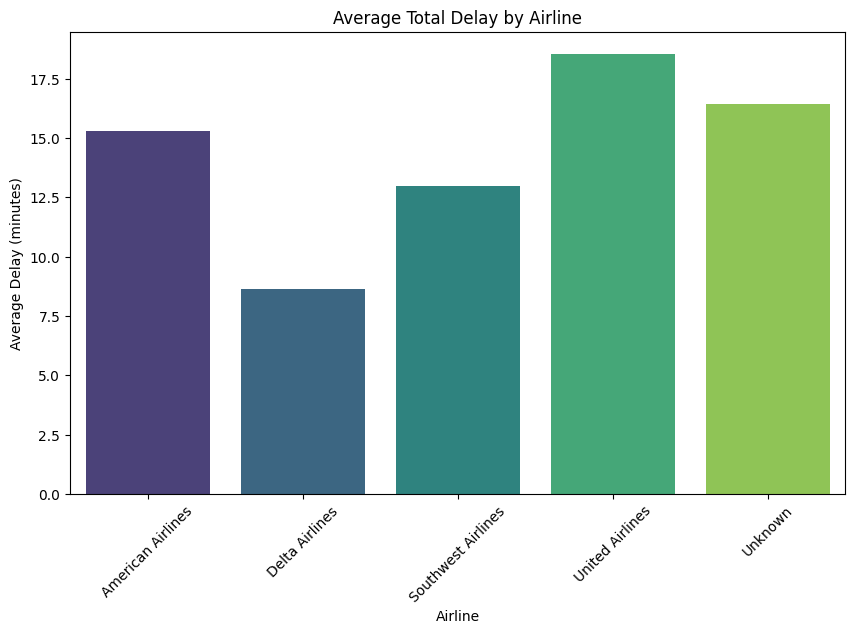

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns


avg_delay_by_airline = pandas_df.groupby('CarrierName')['TotalDelay'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=avg_delay_by_airline, x='CarrierName', y='TotalDelay', palette='viridis')
plt.title('Average Total Delay by Airline')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.show()


<ipython-input-91-addcce4793e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delay_by_weekday, x='Weekday', y='TotalDelay', palette='coolwarm')


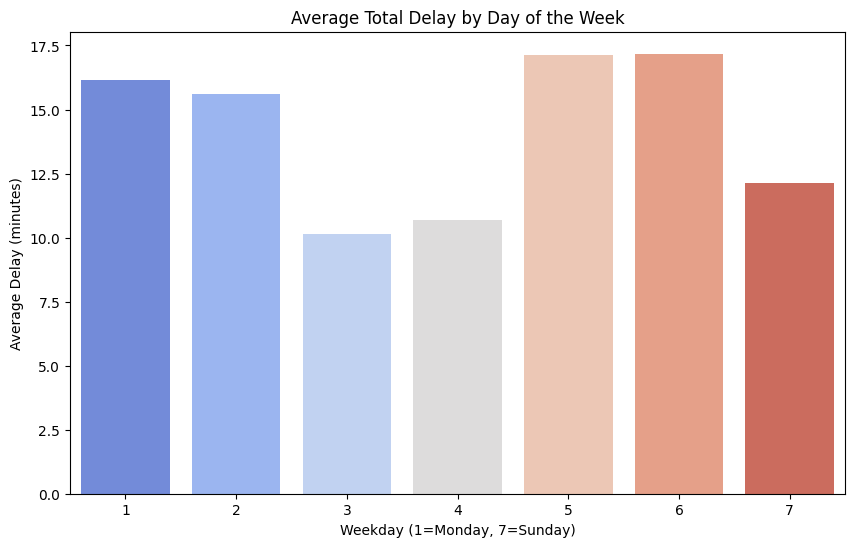

In [91]:

avg_delay_by_weekday = pandas_df.groupby('Weekday')['TotalDelay'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=avg_delay_by_weekday, x='Weekday', y='TotalDelay', palette='coolwarm')
plt.title('Average Total Delay by Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Weekday (1=Monday, 7=Sunday)')
plt.show()
